# Introduction to Computer Vision: Plant Seedlings Classification

By Abebaw Masresha Oct. 2024

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [129]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [130]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [131]:
# General Libraries
import random  # For generating random numbers
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced data visualization
import warnings  # For warning management

# TensorFlow and Keras Libraries
import tensorflow as tf  # Core TensorFlow functionality
from tensorflow.keras import backend  # Keras backend functionality
from tensorflow.keras.models import Sequential, Model  # Model to stack layers sequentially and the Model class
from tensorflow.keras.layers import (  # Various layers for building the model
    Input,
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    GlobalMaxPooling2D,
    BatchNormalization,
    Activation,
    LeakyReLU
)
from tensorflow.keras.optimizers import Adam, RMSprop  # Optimizers for training the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # For implementing early stopping and learning rate adjustments
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from keras.applications import VGG16  # Importing VGG16 for transfer learning

# Scikit-learn Libraries
from sklearn.preprocessing import LabelEncoder  # For label encoding
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets

# Suppress FutureWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

warnings.filterwarnings("ignore", message="Your PyDataset class should call super().__init__")


## Loading the dataset

In [132]:
#connecting and mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#Reading imgaes and labels from Google Drive
path='/content/drive/My Drive/plant_seedlings/'
images=np.load(path+'images.npy')
labels=pd.read_csv(path+'Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [134]:
#printing shapes of the images and labels data
print(f'Shape of the images array: {images.shape}')
print(f'Shape of the labels array: {labels.shape}')

Shape of the images array: (4750, 128, 128, 3)
Shape of the labels array: (4750, 1)


### Shape - Observations:
- **Images**: There are 4750 images, each with a size of 128x128 pixels and 3 color channels (likely RGB).
- **Labels**: There are 4750 labels, each with 1 column, indicating that each image is associated with a single label (likely a class or category).

This means the dataset is well-structured, with an equal number of images and labels, making it suitable for supervised learning tasks like classification.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Labels EDA

In [135]:
#View sample labels
labels.sample(5)

,Label
3713,Maize
3232,Sugar beet
526,Fat Hen
3218,Scentless Mayweed
4324,Loose Silky-bent


Label Dataset Overview
-------------------------
Columns in Labels: ['Label']
Missing Values:
Label    0
dtype: int64
Data Types:
Label    object
dtype: object

Number of Unique Classes: 12
Unique Classes:
['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']

Unique Label Counts:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Imbalance Check:
Class Ratio (Max/Min): 2.96
Mean Count: 395.83
Standard Deviation of Counts: 154.22
Coefficient of Variation (CV): 0.39
Gini Index: 0.91

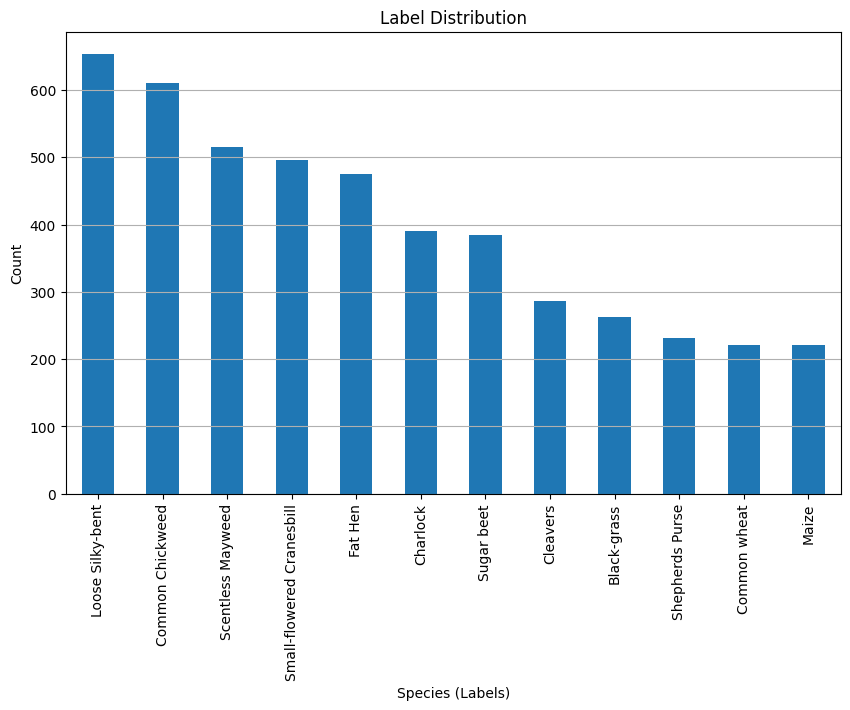

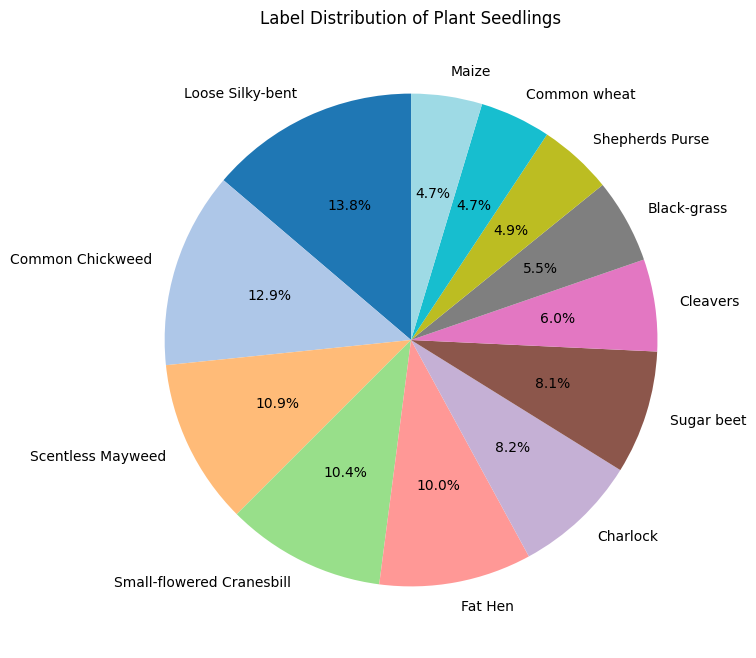

In [136]:
# 1. Label Overview
print("Label Dataset Overview")
print("-" * 25)
print(f"Columns in Labels: {labels.columns.tolist()}")
print(f"Missing Values:\n{labels.isnull().sum()}")
print(f"Data Types:\n{labels.dtypes}")

# 2. Unique Classes
unique_classes = labels['Label'].unique()
num_classes = len(unique_classes)
print(f"\nNumber of Unique Classes: {num_classes}")
print(f"Unique Classes:\n{unique_classes}")

# 3. Unique Label Counts
label_counts = labels['Label'].value_counts()
print("\nUnique Label Counts:")
print(label_counts)

# 4. Check for Imbalance
# Calculate class statistics
max_count = label_counts.max()
min_count = label_counts.min()
class_ratio = max_count / min_count

# Calculate descriptive statistics
mean_count = label_counts.mean()
std_dev_count = label_counts.std()

# Coefficient of Variation (CV)
cv = std_dev_count / mean_count

# Gini Index calculation
gini_index = 1 - sum((label_counts / label_counts.sum()) ** 2)

# Display imbalance results
print("\nImbalance Check:")
print(f"Class Ratio (Max/Min): {class_ratio:.2f}")
print(f"Mean Count: {mean_count:.2f}")
print(f"Standard Deviation of Counts: {std_dev_count:.2f}")
print(f"Coefficient of Variation (CV): {cv:.2f}")
print(f"Gini Index: {gini_index:.2f}")

# Assessing balance without fixed thresholds
if class_ratio > 10:
    balance_assessment = "Severe imbalance"
elif class_ratio > 5:
    balance_assessment = "Moderate imbalance"
else:
    balance_assessment = "Relatively balanced"

print(f"\nBalance Assessment: {balance_assessment}")

# 5. Label Distribution Visualizations
# Bar Chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Species (Labels)")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Pie Chart
plt.figure(figsize=(10, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Label Distribution of Plant Seedlings")
plt.ylabel('')  # Remove the y-label
plt.show()


- **Label Dataset Overview**:
  - The dataset contains a single column labeled **'Label'**.
  - There are **no missing values** in the dataset, indicating completeness.
  - The data type for the **'Label'** column is **object**, which suggests it contains categorical data.

- **Unique Classes**:
  - There are **12 unique classes** present in the dataset.
  - The unique classes are:
    - Small-flowered Cranesbill
    - Fat Hen
    - Shepherds Purse
    - Common wheat
    - Common Chickweed
    - Charlock
    - Cleavers
    - Scentless Mayweed
    - Sugar beet
    - Maize
    - Black-grass
    - Loose Silky-bent

- **Unique Label Counts**:
  - The distribution of class counts varies, with the following observations:
    - The **most frequent class** is **Loose Silky-bent** with **654 instances**.
    - The **least frequent class** is **Maize** and **Common wheat**, each with **221 instances**.
    - The counts for the other classes range from **221** to **654**, indicating some level of imbalance but not extreme.

- **Imbalance Check**:
  - The **class ratio** (maximum count to minimum count) is **2.96**, suggesting moderate imbalance among classes.
  - The **mean count** of labels is **395.83**, indicating an average representation across classes.
  - The **standard deviation** of counts is **154.22**, reflecting variability in class sizes.
  - The **coefficient of variation (CV)** is **0.39**, suggesting moderate dispersion relative to the mean count.
  - The **Gini Index** of **0.91** indicates a high level of inequality in the distribution of classes.

- **Balance Assessment**:
  - The dataset is assessed as **relatively balanced**, meaning that while some classes are more represented than others, the imbalance is not severe enough to significantly impact analysis or model performance.

In [137]:
import cv2

def count_image_formats(images):
    def check_image_format(image):
        avg_colors = np.mean(image, axis=(0, 1))  # Average across height and width
        b, g, r = avg_colors  # For BGR
        return "BGR" if b > r else "RGB"

    # Initialize counters
    bgr_count = 0
    rgb_count = 0

    # Check the format for each image
    for image in images:
        image_format = check_image_format(image)
        if image_format == "BGR":
            bgr_count += 1
        else:
            rgb_count += 1

    # Print the counts
    print(f"Number of BGR images: {bgr_count}")
    print(f"Number of RGB images: {rgb_count}")

# print RGB and BGR formats count
count_image_formats(images)

Number of BGR images: 7
Number of RGB images: 4743


Image Dataset Overview
-------------------------
Image Dimensions:  (128, 128, 3)
Number of Channels:  3
Data Types:  uint8
Minimum Pixel Value:  0
Maximum Pixel Value:  255
Mean Pixel Value:  70.04363745545504
Median Pixel Value:  67.0
Standard Deviation of Pixel Values:  31.996876308515
Number of Unique Pixel Values:  256


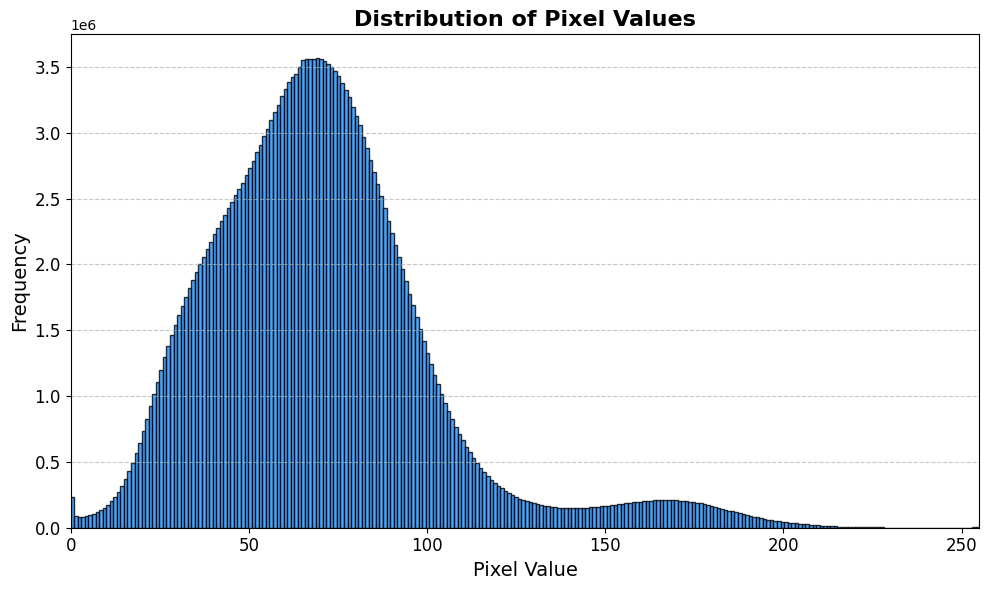

Total Number of Images: 4750
Sample Images Visualization
-------------------------


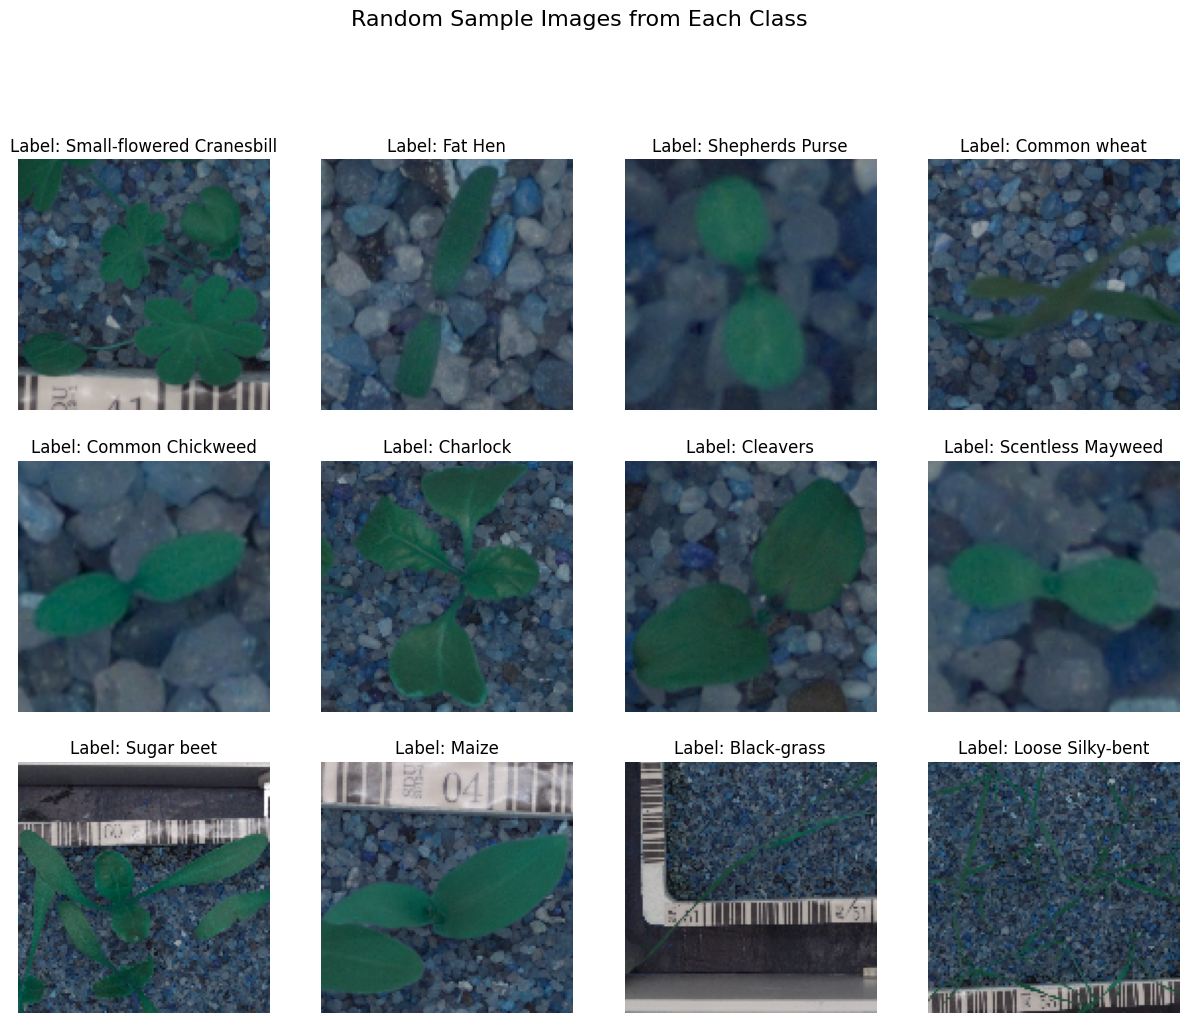

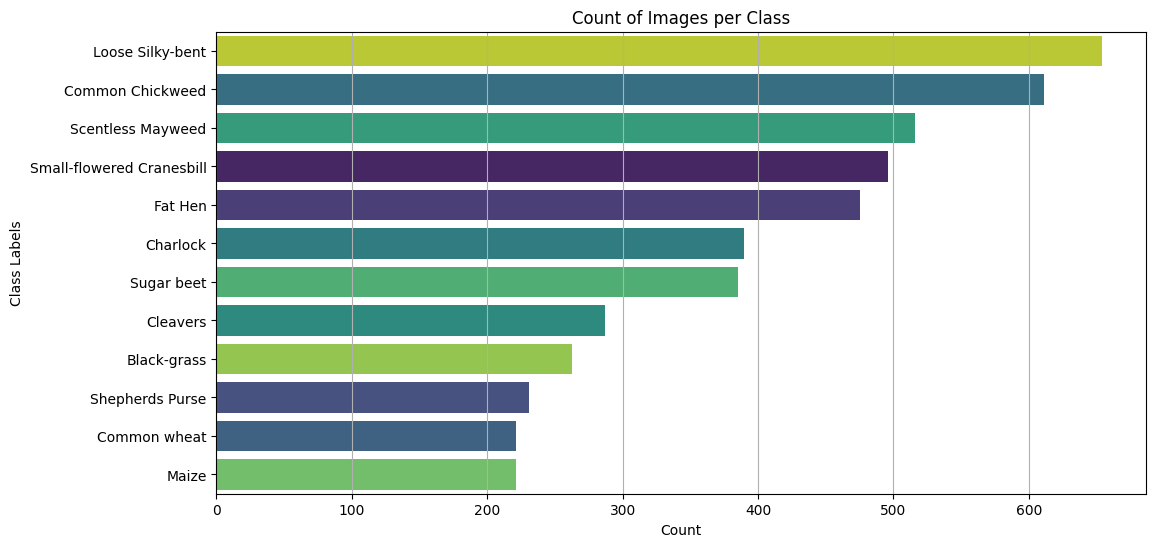


Unique Label Counts:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Imbalance Check:
Class Ratio (Max/Min): 2.96
Balance Assessment: Relatively balanced

Key Observations from EDA:
-------------------------
- Total number of images: 4750
- Unique classes identified: 12
- Minimum and maximum pixel values: 0, 255
- Mean pixel value: 70.04, Standard Deviation: 32.00
- Class ratio indicates relatively balance.
- Distribution of pixel values suggests the presence of dark images on average.


In [138]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Image Overview
print("Image Dataset Overview")
print("-" * 25)

# Display image dimensions
print("Image Dimensions: ", images[0].shape)
print("Number of Channels: ", images[0].shape[2])  # Assuming images are stored as (height, width, channels)

# Data Types
print("Data Types: ", images.dtype)

# Pixel Value Statistics
print("Minimum Pixel Value: ", images.min())
print("Maximum Pixel Value: ", images.max())
print("Mean Pixel Value: ", np.mean(images))
print("Median Pixel Value: ", np.median(images))
print("Standard Deviation of Pixel Values: ", images.std())

# Unique pixel values
unique_pixel_values = np.unique(images)
print("Number of Unique Pixel Values: ", len(unique_pixel_values))

# Distribution of pixel values
plt.figure(figsize=(10, 6))
plt.hist(images.ravel(), bins=256, color='dodgerblue', alpha=0.8, edgecolor='black')
plt.title("Distribution of Pixel Values", fontsize=16, fontweight='bold')
plt.xlabel("Pixel Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adjust grid for better visibility
plt.xlim([0, 255])  # Set x-axis limit for pixel values
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# Checking for Missing Values
num_images = images.shape[0]
print(f"Total Number of Images: {num_images}")

# Sample Visualization
print("Sample Images Visualization")
print("-" * 25)
labels_list = labels['Label'].tolist()  # Assuming labels is a DataFrame

# Plot random images from each class
unique_labels = labels['Label'].unique()
plt.figure(figsize=(15, 15))
for i, label in enumerate(unique_labels):
    # Select indices of images corresponding to the label
    class_indices = np.where(np.array(labels_list) == label)[0]  # Ensure labels_list is a numpy array

    if class_indices.size > 0:  # Check if there are images for the label
        random_index = np.random.choice(class_indices)
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[random_index])
        plt.title(f"Label: {label}")
        plt.axis('off')
    else:
        print(f"No images found for label: {label}")

plt.suptitle("Random Sample Images from Each Class", fontsize=16)
plt.show()

# Count Plot for each category
plt.figure(figsize=(12, 6))
sns.countplot(y='Label', data=labels, order=labels['Label'].value_counts().index, palette='viridis', hue='Label', legend=False)
plt.title("Count of Images per Class")
plt.xlabel("Count")
plt.ylabel("Class Labels")
plt.grid(axis='x')
plt.show()

# Additional Statistics: Check for Class Distribution
label_counts = labels['Label'].value_counts()
print("\nUnique Label Counts:")
print(label_counts)

# Check for Class Imbalance
max_count = label_counts.max()
min_count = label_counts.min()
class_ratio = max_count / min_count

print("\nImbalance Check:")
print(f"Class Ratio (Max/Min): {class_ratio:.2f}")
if class_ratio > 10:
    balance_assessment = "Severe imbalance"
elif class_ratio > 5:
    balance_assessment = "Moderate imbalance"
else:
    balance_assessment = "Relatively balanced"

print(f"Balance Assessment: {balance_assessment}")

# Key Meaningful Observations
print("\nKey Observations from EDA:")
print("-" * 25)
print(f"- Total number of images: {num_images}")
print(f"- Unique classes identified: {len(unique_labels)}")
print(f"- Minimum and maximum pixel values: {images.min()}, {images.max()}")
print(f"- Mean pixel value: {np.mean(images):.2f}, Standard Deviation: {images.std():.2f}")
print(f"- Class ratio indicates {'severe' if class_ratio > 10 else 'moderate' if class_ratio > 5 else 'relatively'} balance.")
print(f"- Distribution of pixel values suggests the presence of {'dark' if images.mean() < 127.5 else 'light'} images on average.")


### Image Dataset Observations
-------------------------
- **Image Dimensions**: Each image has dimensions of \(128 \times 128\) pixels with 3 color channels (RGB), indicating a standard format for color images.
- **Data Type**: The pixel values are stored as `uint8`, which is typical for images, allowing values between 0 and 255.
- **Pixel Value Range**: The minimum pixel value is 0 (black) and the maximum is 255 (white), confirming the full grayscale range is utilized.
- **Mean Pixel Value**: The average pixel value across all images is approximately **70.04**, suggesting that the dataset contains predominantly darker images.
- **Standard Deviation of Pixel Values**: A standard deviation of about **32.00** indicates some variability in pixel intensity, implying diversity in image brightness and contrast.
- **Unique Pixel Values**: There are **256 unique pixel values** (0-255), which is expected for an 8-bit image representation.
- **Total Number of Images**: The dataset comprises **4750 images**, providing a substantial sample size for analysis and model training.
  
### Class Distribution
- **Unique Classes**: There are **12 unique classes** identified in the dataset, each representing a different category of plants.  

### Key Insights
- **Image Diversity**: The data shows diversity in classes and image characteristics, making it suitable for training classification models.
- **Dark Image Trend**: The distribution of pixel values indicates a trend towards darker images on average, which might influence model learning and performance.
- **Sufficient Sample Size**: With 4750 images, the dataset is adequately sized to explore various machine learning approaches and techniques effectively.
- **Imbalance Management**: Although there is a moderate imbalance, strategies such as data augmentation, resampling, or using appropriate evaluation metrics can help mitigate any potential negative effects on model training.
- The dataset consists of 4750 images, with 4743 in RGB format and only 7 in BGR format, indicating a high level of consistency in image formats. However, the presence of BGR images may lead to compatibility issues in processing and model training, so converting them to RGB is recommended for uniformity.


## Data Pre-Processing

### Convert the BGR images to RGB images.

In [139]:
# Convert BGR to RGB
print("Before conversion:")
count_image_formats(images)
images_converted = np.array([image[..., ::-1] if np.mean(image[..., 0]) > np.mean(image[..., 2]) else image for image in images])

print("-"*30)
print("After conversion:")
count_image_formats(images_converted)


Before conversion:
Number of BGR images: 7
Number of RGB images: 4743
------------------------------
After conversion:
Number of BGR images: 0
Number of RGB images: 4750


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

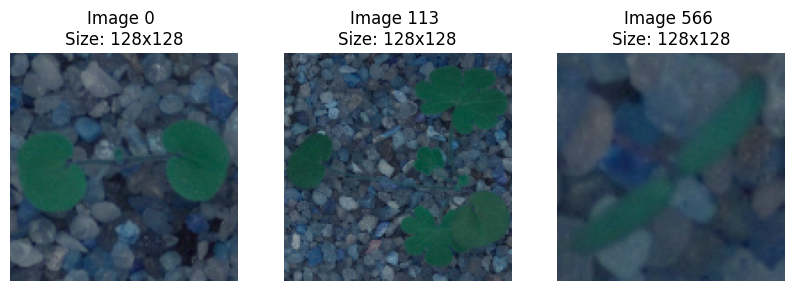

In [189]:
# View three images with thier origina size, 128x128
indices = [0, 113, 566]

plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
    plt.imshow(images_converted[idx])
    plt.axis('off')  # Hide axis

    # Get the shape of the image
    height, width, _ = images_converted[idx].shape
    plt.title(f"Image {idx} \nSize: {width}x{height}")  # Title with index and size

plt.show()

In [180]:
#Reszing the image from 128 to 64
images_original_size=images.copy()
reshaped_images = []

for image in images_converted:
  #reshape the images
  reshaped_image=cv2.resize(image,(64,64))
  reshaped_images.append(reshaped_image)

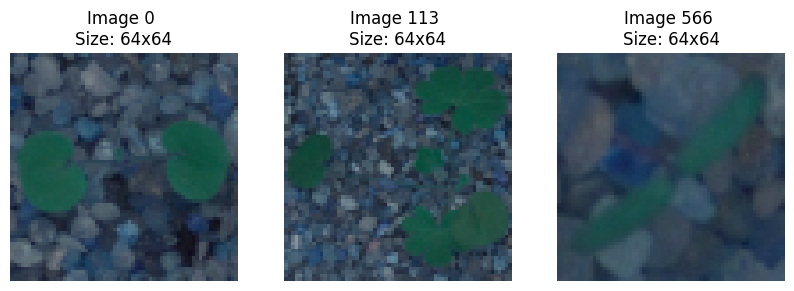

In [190]:
# View three images after resizing to 64x64
plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
    plt.imshow(reshaped_images[idx])
    plt.axis('off')  # Hide axis

    # Get the shape of the image
    height, width, _ = reshaped_images[idx].shape
    plt.title(f"Image {idx} \nSize: {width}x{height}")  # Title with index and size

plt.show()

### Visualizing images using Gaussian Blur
I have decided not to use Gaussian blur in our image preprocessing for the plant seedling classification project. This choice is based on the observation that applying Gaussian blur negatively impacted model performance by obscuring critical details necessary for distinguishing between plant species. Additionally, it diminished the effectiveness of data augmentation techniques, leading to less informative training data. By excluding Gaussian blur, we aim to preserve image quality and enhance the model's accuracy.

In [141]:
# # Applying Gaussian Blur to denoise the images
# images_gb=[]
# for i in range(len(reshaped_images)):
#   # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
#   images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

In [142]:
# #view a blurred image
# plt.imshow(images_gb[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [143]:
from sklearn.model_selection import train_test_split

images2=images.copy()
images=reshaped_images.copy()
# Split train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the test data further into validation (50%) and test (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 3800
Validation size: 475
Test size: 475


In [144]:
#calculate percentages for each seedling in the training, validation, and testing sets
train_class_counts = y_train.value_counts(normalize=True) * 100
val_class_counts = y_val.value_counts(normalize=True) * 100
test_class_counts = y_test.value_counts(normalize=True) * 100

#printing class balances between each
print("Training set class distribution (%):")
print("-"*35)
print(train_class_counts)
print("\nValidation set class distribution (%):")
print("-"*35)
print(val_class_counts)
print("\nTesting set class distribution (%):")
print("-"*35)
print(test_class_counts)

Training set class distribution (%):
-----------------------------------
Label                    
Loose Silky-bent             13.500000
Common Chickweed             13.394737
Scentless Mayweed            10.815789
Small-flowered Cranesbill    10.052632
Fat Hen                      10.026316
Charlock                      8.263158
Sugar beet                    8.210526
Cleavers                      5.921053
Black-grass                   5.684211
Common wheat                  4.815789
Maize                         4.710526
Shepherds Purse               4.605263
Name: proportion, dtype: float64

Validation set class distribution (%):
-----------------------------------
Label                    
Loose Silky-bent             14.315789
Small-flowered Cranesbill    12.000000
Scentless Mayweed            10.736842
Common Chickweed             10.526316
Fat Hen                      10.315789
Charlock                      9.684211
Sugar beet                    9.263158
Cleavers                 

### Observations:
- **Top 3 classes**: Loose Silky-bent, Small-flowered Cranesbill, and Scentless Mayweed consistently dominate the distributions across training (13.5%, 10.05%, 10.82%), validation (14.32%, 12%, 10.74%), and testing sets (15.37%, 12%, 11.37%).
- **Class balance**: The distributions are relatively balanced, with the top class (Loose Silky-bent) not exceeding 15.37% and the bottom class (Common wheat) above 3.78% in all sets.
- **Consistency across sets**: The class distributions show reasonable consistency across training, validation, and testing sets, indicating a well-split dataset.

In [145]:
# Total images before splitting
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

# Total images after splitting
print(f"Training images: {len(X_train)}, Training labels: {len(y_train)}")
print(f"Validation images: {len(X_val)}, Validation labels: {len(y_val)}")
print(f"Testing images: {len(X_test)}, Testing labels: {len(y_test)}")

# Check if the sum matches the original dataset size
assert len(images) == len(X_train) + len(X_val) + len(X_test), "Image split mismatch!"
assert len(labels) == len(y_train) + len(y_val) + len(y_test), "Label split mismatch!"

print("Data split verified: all images and labels are correctly distributed.")


Total images: 4750
Total labels: 4750
Training images: 3800, Training labels: 3800
Validation images: 475, Validation labels: 475
Testing images: 475, Testing labels: 475
Data split verified: all images and labels are correctly distributed.


### Encode the target labels

In [146]:
#target training dataset
y_train.sample(3)

,Label
2222,Charlock
2668,Cleavers
4446,Loose Silky-bent


In [147]:
#target test dataset
y_test.sample(3)

,Label
3628,Maize
2813,Scentless Mayweed
3674,Maize


In [148]:
#target val dataset
y_val.sample(3)

,Label
1833,Common Chickweed
1643,Common Chickweed
2533,Cleavers


### Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder

# 1. Initialize the LabelEncoder
label_encoder = LabelEncoder()

# 2. Fit and transform the labels to integers (flatten the DataFrame/Series)
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())
y_val_encoded = label_encoder.transform(y_val.values.ravel())

# Get the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

# Save the label mapping to a DataFrame for easier visualization
label_mapping_df = pd.DataFrame(list(label_mapping.items()), columns=['Label', 'Encoded Label'])
print(label_mapping_df)

# 3. Convert to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
y_val_one_hot = tf.keras.utils.to_categorical(y_val_encoded)

y_train = y_train_one_hot
y_test = y_test_one_hot
y_val = y_val_one_hot

Black-grass: 0
Charlock: 1
Cleavers: 2
Common Chickweed: 3
Common wheat: 4
Fat Hen: 5
Loose Silky-bent: 6
Maize: 7
Scentless Mayweed: 8
Shepherds Purse: 9
Small-flowered Cranesbill: 10
Sugar beet: 11
                        Label  Encoded Label
0                 Black-grass              0
1                    Charlock              1
2                    Cleavers              2
3            Common Chickweed              3
4                Common wheat              4
5                     Fat Hen              5
6            Loose Silky-bent              6
7                       Maize              7
8           Scentless Mayweed              8
9             Shepherds Purse              9
10  Small-flowered Cranesbill             10
11                 Sugar beet             11


In [150]:
#sample print for training dataset
pd.DataFrame(y_train_one_hot).sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11
636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [151]:
#sample print for test dataset
pd.DataFrame(y_test_one_hot).sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11
27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [152]:
#sample print for validation dataset
pd.DataFrame(y_val_one_hot).sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11
222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Normalization

In [153]:
X_train = np.array(X_train)  # Convert training images to a NumPy array
X_val = np.array(X_val)      # Convert validation images to a NumPy array
X_test = np.array(X_test)    # Convert test images to a NumPy array

#normalize the data
X_train_normalized=X_train/255
X_val_normalized=X_val/255
X_test_normalized=X_test/255

X_train=X_train_normalized
X_val=X_val_normalized
X_test=X_test_normalized

In [154]:
# Function to check normalized values for a given dataset
def check_normalized_values(data, dataset_name):
    if np.all((data >= 0) & (data <= 1)):
        print(f"All images in {dataset_name} have pixel values in the range [0, 1].")
    else:
        print(f"Some images in {dataset_name} have values outside the range [0, 1].")

# Check for all datasets
check_normalized_values(X_train, "X_train")
check_normalized_values(X_val, "X_val")
check_normalized_values(X_test, "X_test")


All images in X_train have pixel values in the range [0, 1].
All images in X_val have pixel values in the range [0, 1].
All images in X_test have pixel values in the range [0, 1].


In [155]:
#check shapes of the datasets
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3800, 64, 64, 3) (3800, 12)
(475, 64, 64, 3) (475, 12)
(475, 64, 64, 3) (475, 12)


## Model Building
### Model Evaluation Criterion

**Objective:** Accurately classify images of plant seedlings into their respective species.

**Primary Metric:**

**Accuracy:** Accuracy is crucial for the plant seedlings classification problem. It measures the proportion of correct predictions out of the total, offering a clear view of the model's performance across all species.

**Rationale:**

1. **Overall Performance Measurement:** Accuracy indicates how well the model identifies each of the 12 plant species, ensuring a high percentage of correct predictions.

2. **Balanced Classes:** With relatively balanced image counts for each species, accuracy reliably assesses the model's effectiveness without bias toward any particular class.

3. **User Relevance:** For agricultural practitioners, overall accuracy informs them about the model's reliability in real-world applications, enhancing trust in automated identification systems.


### Algorithm Selection: Convolutional Neural Network (CNN)

We chose a Convolutional Neural Network (CNN) for plant seedling classification due to its excellent image processing capabilities. CNNs automatically extract features from images, reducing the need for manual engineering. Their architecture learns spatial patterns, ensuring high accuracy despite variations. With a strong track record in image classification, CNNs effectively identify different plant seedlings, enhancing agricultural technology.


### Model Name: model_initial

In [156]:
#Clearing backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [157]:
# Initialize a sequential model
model_initial = Sequential()

# Define the input layer explicitly using the Input layer
model_initial.add(Input(shape=X_train.shape[1:]))

# First convolutional layer with 64 filters, 3x3 kernel, padding 'same'
model_initial.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding a MaxPooling layer and Dropout
model_initial.add(MaxPooling2D((2, 2)))
model_initial.add(Dropout(0.25))

# Second convolutional layer with 64 filters
model_initial.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_initial.add(MaxPooling2D((2, 2)))
model_initial.add(Dropout(0.25))

# Third convolutional layer with 128 filters
model_initial.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_initial.add(MaxPooling2D((2, 2)))
model_initial.add(Dropout(0.25))

# Fourth convolutional layer with 128 filters
model_initial.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_initial.add(MaxPooling2D((2, 2)))
model_initial.add(Dropout(0.25))

# Fifth convolutional layer with 256 filters, using padding 'same' to avoid shrinking dimensions
model_initial.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_initial.add(MaxPooling2D((2, 2)))
model_initial.add(Dropout(0.25))

# Flattening the layers for the fully connected layers
model_initial.add(Flatten())

# Adding a Dense layer with 512 neurons
model_initial.add(Dense(512, activation='relu'))
model_initial.add(Dropout(0.5))

# Adding the output layer with 12 neurons (for 12 classes) and softmax activation for multi-class classification
model_initial.add(Dense(12, activation='softmax'))

# printing the model summary
model_initial.summary()

# Compile the model
model_initial.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping callback
history_initial = model_initial.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[early_stopping]
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,086,284 (4.14 MB)

 Trainable params: 1,086,284 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.1222 - loss: 2.4385 - val_accuracy: 0.2358 - val_loss: 2.2432
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2928 - loss: 2.0262 - val_accuracy: 0.4484 - val_loss: 1.5873
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.4280 - loss: 1.5816 - val_accuracy: 0.5263 - val_loss: 1.3660
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.5076 - loss: 1.3423 - val_accuracy: 0.5579 - val_loss: 1.2368
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.5600 - loss: 1.2172 - val_accuracy: 0.6863 - val_loss: 0.9034
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.6298 - loss: 1.0303 - val_accuracy: 0.7011 - val_loss: 0.8559
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.6792 - loss: 0.9001 - val_accuracy: 0.7095 - val_loss: 0.8187
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.7007 - loss: 0

In [158]:
# Save the model to the specified path
model_path = '/content/drive/My Drive/plant_seedlings/model_initial_reshaped.keras'
# Assume 'model' is your trained model
model_initial.save(model_path)

# Convert history to a DataFrame
history_df = pd.DataFrame(history_initial.history)

# Save the history to Google Drive
history_path = '/content/drive/My Drive/plant_seedlings/history_initial_reshaped.csv'
history_df.to_csv(history_path, index=False)

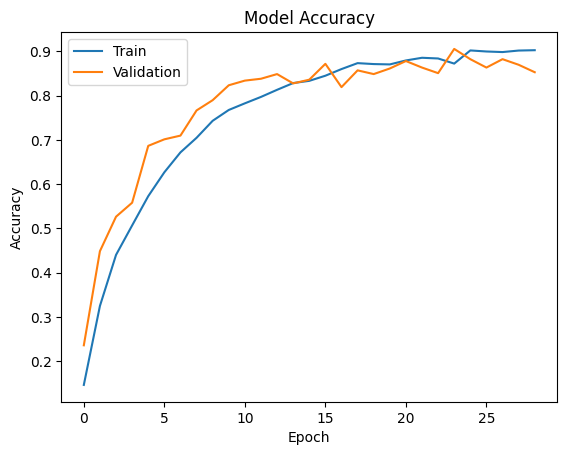

In [159]:
plt.plot(history_initial.history['accuracy'])
plt.plot(history_initial.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

### Model Performance on all datasets

In [160]:
#print performance metrics
from operator import index
_,train_performace_initial = model_initial.evaluate(X_train,y_train);
_,val_performace_initial = model_initial.evaluate(X_val,y_val);
_,test_performace_initial = model_initial.evaluate(X_test,y_test);
data={'Train':train_performace_initial
        ,'Validation':val_performace_initial
        ,'Test':test_performace_initial}
result=pd.DataFrame(data,index=['Accuracy'])
print("\n")
print("Model Performance")
print("-"*17)
result

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9411 - loss: 0.1512
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9028 - loss: 0.3573
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8210 - loss: 0.6034


Model Performance
-----------------


,Train,Validation,Test
Accuracy,0.942632,0.905263,0.837895


In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you already have your model predictions
y_pred = model_initial.predict(X_test)

# If your model outputs probabilities, get the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to class indices for y_test
y_test_classes = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')  # Use 'micro', 'macro', or 'weighted' based on your needs
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Accuracy: 0.8379
Precision: 0.8372
Recall: 0.8379
F1 Score: 0.8341


### Predicting Plant Seedlings on Test Data
- Predicting Probabilities for Each Category Using the Initial Model

In [161]:
# Here we would get the output as probablities for each category
y_pred_model_initial=model_initial.predict(X_test)
y_pred_model_initial

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[5.3888388e-10, 4.9467139e-06, 1.0338685e-07, ..., 6.1318725e-01,
        1.6342661e-06, 7.1675655e-05],
       [1.5873347e-09, 1.8250592e-05, 1.5629156e-06, ..., 7.6577794e-03,
        1.2025161e-05, 8.9984629e-03],
       [4.7246704e-04, 1.8503016e-02, 7.7794599e-03, ..., 5.3000844e-01,
        4.6576314e-02, 2.0041145e-02],
       ...,
       [5.3729046e-08, 4.5930707e-07, 1.7433218e-03, ..., 1.4337689e-06,
        1.1885292e-05, 1.6645492e-05],
       [1.8874412e-13, 4.5644413e-07, 5.5308529e-11, ..., 8.8870752e-01,
        5.4737373e-04, 1.0927492e-08],
       [3.8723809e-01, 1.2129815e-03, 6.9867601e-03, ..., 4.3506053e-04,
        2.0154681e-02, 7.5960524e-02]], dtype=float32)

### Confusion Matrix

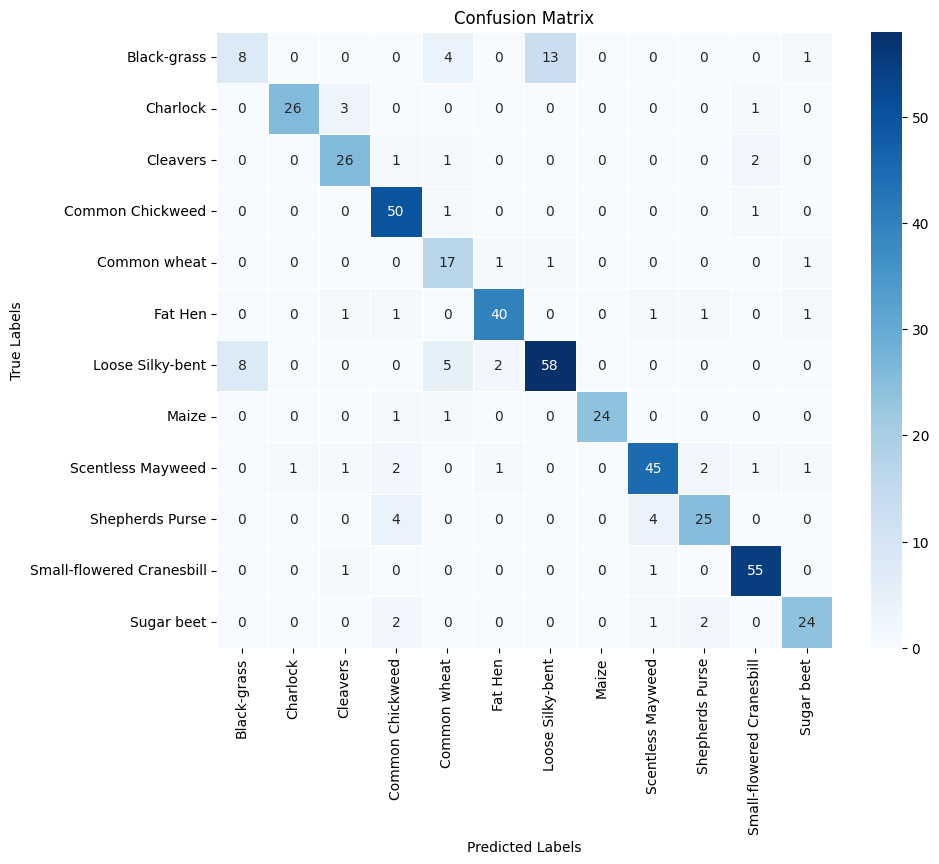

In [162]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Convert predictions to label indices
y_pred_arg_initial = np.argmax(y_pred_model_initial, axis=1)
y_test_arg_initial = y_test_encoded.astype(np.int32)

# Ensure y_pred_arg_initial is also int32 for compatibility
y_pred_arg_initial = y_pred_arg_initial.astype(np.int32)

# Generate the confusion matrix using scikit-learn (recommended)
confusion_matrix = sk_confusion_matrix(y_test_arg_initial, y_pred_arg_initial)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    cmap="Blues",
    linewidths=.4,
    fmt="d",
    square=True,
    xticklabels=list(label_mapping.keys()),
    yticklabels=list(label_mapping.keys())
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_matrix)

### Observations (*`model_initial`*)
**Confusion Matrix Observations:**
- **High Accuracy Classifications:**
  - The model performs well with high accuracy in classes like *Common Chickweed* (Class 3), *Charlock* (Class 1), *Small-flowered Cranesbill* (Class 10), and *Loose Silky-bent* (Class 6), where the majority of predictions are correctly classified.

- **Misclassification Patterns:**
  - *Loose Silky-bent* (Class 6) is sometimes confused with *Black-grass* (Class 0), as indicated by the 8 misclassified instances.
  - *Black-grass* (Class 0) has a notable number of misclassifications into *Loose Silky-bent* (13 instances).
  - *Common Wheat* (Class 4) occasionally gets misclassified into nearby classes like *Black-grass* and *Fat Hen* (Classes 0 and 5).

- **Low Misclassification for Certain Classes:**
  - Classes like *Maize* (Class 7) and *Scentless Mayweed* (Class 8) show relatively low misclassification rates, suggesting the model is effective at identifying these categories.

- **Moderate Confusion in Similar Classes:**
  - *Scentless Mayweed* (Class 8) shows some confusion with *Shepherd’s Purse* (Class 9) and *Cleavers* (Class 2). This could be due to visual similarities in the dataset.
  - The class *Fat Hen* (Class 5) shows a few misclassifications distributed across different categories, including *Common Chickweed* and *Scentless Mayweed*.

**Performance Insights:**

- **Overall Model Accuracy:**
  - The model achieves good accuracy across the different datasets:
    - **Training Accuracy:** **0.9426** – The model performs well on training data, indicating it has learned effectively from the data.
    - **Validation Accuracy:** **0.9053** – A slightly lower accuracy than the training set, indicating some generalization ability but potential room for improvement.

- **Test Metrics:**
  - The model demonstrates a balanced performance with an accuracy of **83.79%**, indicating it correctly classifies a significant majority of instances.
  - It maintains a **precision of 83.72%** and a **recall of 83.79%**, suggesting it effectively identifies relevant instances with a good trade-off between false positives and false negatives.

## Model Performance Improvement

To enhance model performance, we will implement the ReduceLROnPlateau callback, which dynamically adjusts the learning rate based on the validation loss, helping to avoid local minima and improving convergence. Additionally, we will employ data augmentation techniques to artificially expand our training dataset, introducing variability and enabling the model to learn more robust features. Together, these strategies will help improve generalization and overall accuracy in the plant seedling classification task.

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.
- Data augmentation is beneficial for the plant seedlings classification problem because it increases the diversity of the training dataset by applying transformations like rotation, flipping, scaling, and brightness adjustments. This helps the model become more robust and generalize better, reducing overfitting and improving performance, especially when dealing with variations in plant orientation, size, and lighting conditions.

### Model Name : model_augmented

In [163]:
#Clearing backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [164]:

# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Model Initialization
model_augmented = Sequential()

# Define the input layer explicitly using the Input layer
model_augmented.add(Input(shape=X_train.shape[1:]))

# First convolutional block
model_augmented.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_augmented.add(BatchNormalization())
model_augmented.add(MaxPooling2D((2, 2)))
model_augmented.add(Dropout(0.25))

# Second convolutional block
model_augmented.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_augmented.add(BatchNormalization())
model_augmented.add(MaxPooling2D((2, 2)))
model_augmented.add(Dropout(0.25))

# Third convolutional block
model_augmented.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_augmented.add(BatchNormalization())
model_augmented.add(MaxPooling2D((2, 2)))
model_augmented.add(Dropout(0.25))

# Fourth convolutional block
model_augmented.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_augmented.add(BatchNormalization())
model_augmented.add(MaxPooling2D((2, 2)))
model_augmented.add(Dropout(0.25))

# Fifth convolutional block
model_augmented.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_augmented.add(BatchNormalization())
model_augmented.add(MaxPooling2D((2, 2)))
model_augmented.add(Dropout(0.25))

# Flatten and fully connected layers
model_augmented.add(Flatten())
model_augmented.add(Dense(512, activation='relu'))
model_augmented.add(Dropout(0.5))
model_augmented.add(Dense(12, activation='softmax'))  # 12 classes for multi-class classification

# Compile the model
model_augmented.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history_augmented = model_augmented.fit(
    datagen.flow(X_train, y_train, batch_size=38),  # Flowing augmented data
    validation_data=(X_val, y_val),
    epochs=70,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.2180 - loss: 3.3048 - val_accuracy: 0.0379 - val_loss: 6.5611 - learning_rate: 0.0010
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.4570 - loss: 1.5738 - val_accuracy: 0.0589 - val_loss: 7.7167 - learning_rate: 0.0010
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.5558 - loss: 1.3218 - val_accuracy: 0.1411 - val_loss: 8.3069 - learning_rate: 0.0010
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6047 - loss: 1.1662
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.6047 - loss: 1.1661 - val_accuracy: 0.1621 - val_loss: 6.6860 - learning_rate: 0.0010
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.6746 - loss: 0.9517 - val_accuracy: 0.0716 - val_loss: 4.7031 - learning_rate: 5.0000e-04
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.7114 - los

In [165]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (3800, 64, 64, 3)
Shape of y_train: (3800, 12)


In [166]:
# Save the model to the specified path
model_path = '/content/drive/My Drive/plant_seedlings/model_augmented.keras'
# Assume 'model' is your trained model
model_augmented.save(model_path)

# Convert history to a DataFrame
history_df = pd.DataFrame(history_augmented.history)

# Save the history to Google Drive
history_path = '/content/drive/My Drive/plant_seedlings/history_augmented.csv'
history_df.to_csv(history_path, index=False)

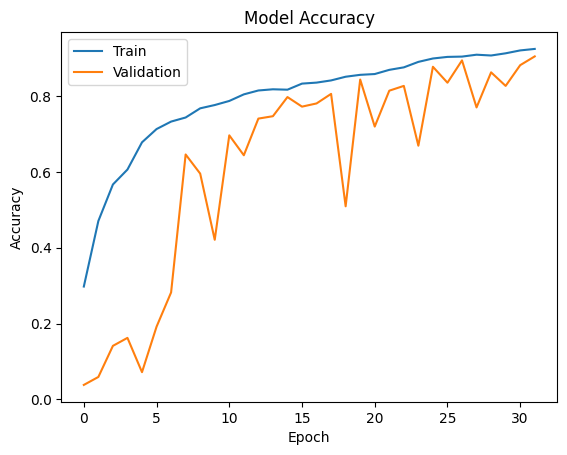

In [167]:
plt.plot(history_augmented.history['accuracy'])
plt.plot(history_augmented.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

### Model Performance in all datasets

In [168]:
#print model performance metrics
from operator import index
_,train_performace_augmented = model_augmented.evaluate(X_train,y_train);
_,val_performace_augmented = model_augmented.evaluate(X_val,y_val);
_,test_performace_augmented = model_augmented.evaluate(X_test,y_test);
data={'Train':train_performace_augmented
        ,'Validation':val_performace_augmented
        ,'Test':test_performace_augmented}
result=pd.DataFrame(data,index=['Accuracy'])
print("\n")
print("Model Performance")
print("-"*17)
result

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9420 - loss: 0.1333
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9000 - loss: 0.2961
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8871 - loss: 0.4275


Model Performance
-----------------


,Train,Validation,Test
Accuracy,0.948158,0.894737,0.882105


In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model_augmented.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to class indices for y_test
y_test_classes = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')  # Use 'micro', 'macro', or 'weighted' based on your needs
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Accuracy: 0.8821
Precision: 0.8920
Recall: 0.8821
F1 Score: 0.8849


### Predicting Plant Seedlings on Test Data
- Predicting Probabilities for Each Category Using the model_augmented

In [169]:
#Making predictions on the test data
y_pred_test_augmented = model_augmented.predict(X_test)
y_pred_test_augmented

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


array([[8.16021972e-10, 3.16255409e-06, 1.02878130e-10, ...,
        9.91928995e-01, 2.96894391e-03, 4.41782358e-05],
       [1.54459485e-07, 3.06814618e-05, 2.76407775e-07, ...,
        5.54945132e-07, 2.88485113e-04, 7.48666662e-06],
       [1.88971608e-05, 2.72675185e-04, 2.60841625e-04, ...,
        5.76261384e-03, 4.57048416e-04, 1.03932514e-04],
       ...,
       [1.66540985e-06, 3.78196425e-08, 7.82971128e-08, ...,
        1.01296646e-05, 1.14187844e-06, 3.42898716e-06],
       [6.37353451e-12, 1.19415517e-05, 3.49778401e-11, ...,
        9.98557985e-01, 1.38036034e-04, 6.52126801e-07],
       [5.53352311e-02, 1.94860440e-05, 1.33517024e-05, ...,
        2.85913347e-06, 4.69191087e-04, 9.38098609e-01]], dtype=float32)

### Confusion Matrix

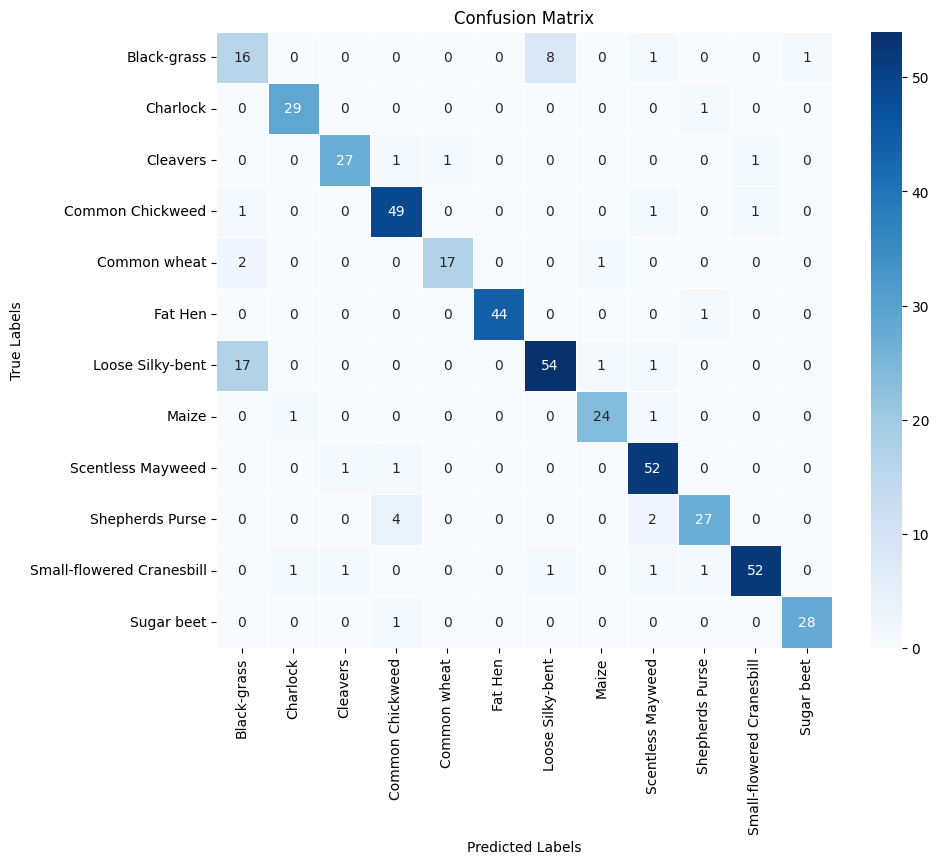

In [170]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Convert predictions to label indices
y_pred_arg_augmented = np.argmax(y_pred_test_augmented, axis=1)
y_test_arg_augmented = y_test_encoded.astype(np.int32)

# Ensure y_pred_arg_initial is also int32 for compatibility
y_pred_arg_augmented = y_pred_arg_augmented.astype(np.int32)

# Generate the confusion matrix using scikit-learn (recommended)
confusion_matrix_augmented = sk_confusion_matrix(y_test_arg_augmented, y_pred_arg_augmented)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_augmented,
    annot=True,
    cmap="Blues",
    linewidths=.4,
    fmt="d",
    square=True,
    xticklabels=list(label_mapping.keys()),
    yticklabels=list(label_mapping.keys())
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_matrix_augmented)

### Observations (`model_augmented`)
### Key Insights

- **Confusion Matrix Highlights**:
  - **Black-grass (Class 0)** has notable misclassifications, particularly as **Common wheat (Class 4)** and **Fat Hen (Class 5)**.
  - **Common Chickweed (Class 3)** frequently misclassifies into multiple classes, including **Maize (Class 7)** and **Sugar beet (Class 11)**.
  - The model performs well in distinguishing **Charlock (Class 1)**, **Cleavers (Class 2)**, and **Loose Silky-bent (Class 6)**, with no significant misclassifications.

- **Performance Metrics**:
  - **Training Accuracy**: 94% indicates strong learning from the training data.
  - **Validation Accuracy**: 89% shows good generalization but a drop from training.
  - **Test Accuracy**: 88% indicates a good model with better generalization.
  - **Additional Evaluation Metrics**:
    - **Accuracy**: 88.21% demonstrates robust classification performance.
    - **Precision**: 89.20% indicates a strong ability to identify relevant instances while maintaining a low false positive rate.
    - **Recall**: 88.21% reflects the model's effectiveness in capturing most of the actual positive instances.
    - **F1 Score**: 88.49% underscores the model’s effectiveness by balancing precision and recall.

# Transfer Learning using VGG16

- VGG16 is a pre-trained deep learning model widely used for transfer learning tasks like plant seedling classification due to its simple yet powerful architecture, consisting of 16 layers that efficiently extract features from images, allowing for high-accuracy classification with minimal training on custom datasets.

In [171]:
#Clearing backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [172]:
# Clearing backend
tf.keras.backend.clear_session()

# Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

# Fit the data augmentation on the training data
datagen.fit(X_train)

# Model Initialization
model_augmented_vgg16 = Sequential()

# Adding the convolutional part of the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))  # Input shape needs to match your data
model_augmented_vgg16.add(vgg_model)

# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten and fully connected layers
model_augmented_vgg16.add(Flatten())
model_augmented_vgg16.add(Dense(512, activation='relu'))
model_augmented_vgg16.add(Dropout(0.5))
model_augmented_vgg16.add(Dense(12, activation='softmax'))  # 12 classes for multi-class classification

# Compile the model
model_augmented_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history_augmented_vgg16 = model_augmented_vgg16.fit(
    datagen.flow(X_train, y_train, batch_size=38),  # Flowing augmented data
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the test set
score = model_augmented_vgg16.evaluate(X_test, y_test, verbose=0, batch_size=38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model as Keras in Google Drive
model_augmented_vgg16.save('/content/drive/MyDrive/model_augmented_vgg16.keras')

# Save the training history in Google Drive
history_df_vgg16 = pd.DataFrame(history_augmented_vgg16.history)
history_df_vgg16.to_csv('/content/drive/MyDrive/history_augmented_vgg16.csv', index=False)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 351ms/step - accuracy: 0.2250 - loss: 2.3363 - val_accuracy: 0.5179 - val_loss: 1.6141 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.4008 - loss: 1.7342 - val_accuracy: 0.5242 - val_loss: 1.4695 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 351ms/step - accuracy: 0.4622 - loss: 1.5671 - val_accuracy: 0.5642 - val_loss: 1.3411 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 351ms/step - accuracy: 0.4898 - loss: 1.4747 - val_accuracy: 0.5832 - val_loss: 1.3229 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.5156 - loss: 1.3830 - val_accuracy: 0.5916 - val_loss: 1.2293 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.5256 - loss: 1.3438 - val_accuracy: 0.6168 - val_loss: 1.1861 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.5556 - loss:

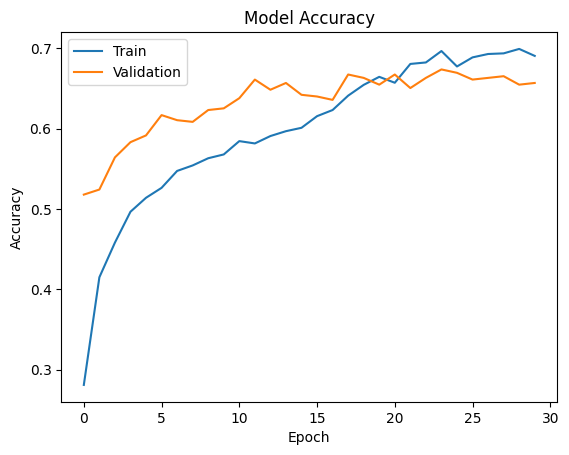

In [173]:
plt.plot(history_augmented_vgg16.history['accuracy'])
plt.plot(history_augmented_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

### Model Performance in all datasets

In [174]:
#print performance metrics
from operator import index
_,train_performace_vgg16 = model_augmented_vgg16.evaluate(X_train,y_train);
_,val_performace_vgg16 = model_augmented_vgg16.evaluate(X_val,y_val);
_,test_performace_vgg16 = model_augmented_vgg16.evaluate(X_test,y_test);
data={'Train':train_performace_vgg16
        ,'Validation':val_performace_vgg16
        ,'Test':test_performace_vgg16}
result=pd.DataFrame(data,index=['Accuracy'])
print("\n")
print("Model Performance")
print("-"*17)
result

119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - accuracy: 0.7763 - loss: 0.6732
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.6850 - loss: 0.8834
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.6079 - loss: 1.1641


Model Performance
-----------------


,Train,Validation,Test
Accuracy,0.773158,0.663158,0.621053


### Predicting Plant Seedlings on Test Data
- Predicting Probabilities for Each Category Using the `model_augmented_vgg16`

In [175]:
#Making predictions on the test data
y_pred_test_augmented_vgg16 = model_augmented_vgg16.predict(X_test)
y_pred_test_augmented_vgg16

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step


array([[4.39825598e-08, 1.87971964e-02, 3.52496636e-06, ...,
        1.06831286e-02, 9.35421944e-01, 7.10668415e-03],
       [1.32607147e-05, 4.29679155e-01, 1.30773697e-03, ...,
        1.00939081e-03, 5.59587218e-02, 1.54253775e-02],
       [8.33125552e-04, 9.29918326e-03, 1.95295304e-01, ...,
        5.34864201e-04, 1.59313297e-03, 1.82164870e-02],
       ...,
       [4.07125946e-04, 2.35393830e-02, 9.42459032e-02, ...,
        1.04238324e-01, 1.48470715e-01, 8.00397340e-03],
       [1.49326377e-06, 6.20028675e-02, 1.94641998e-05, ...,
        4.25781682e-02, 4.16337848e-01, 3.15040380e-01],
       [4.96988632e-02, 6.94092072e-04, 7.41704851e-02, ...,
        2.02235060e-05, 7.95412852e-05, 1.21080987e-01]], dtype=float32)

### Confusion Matrix

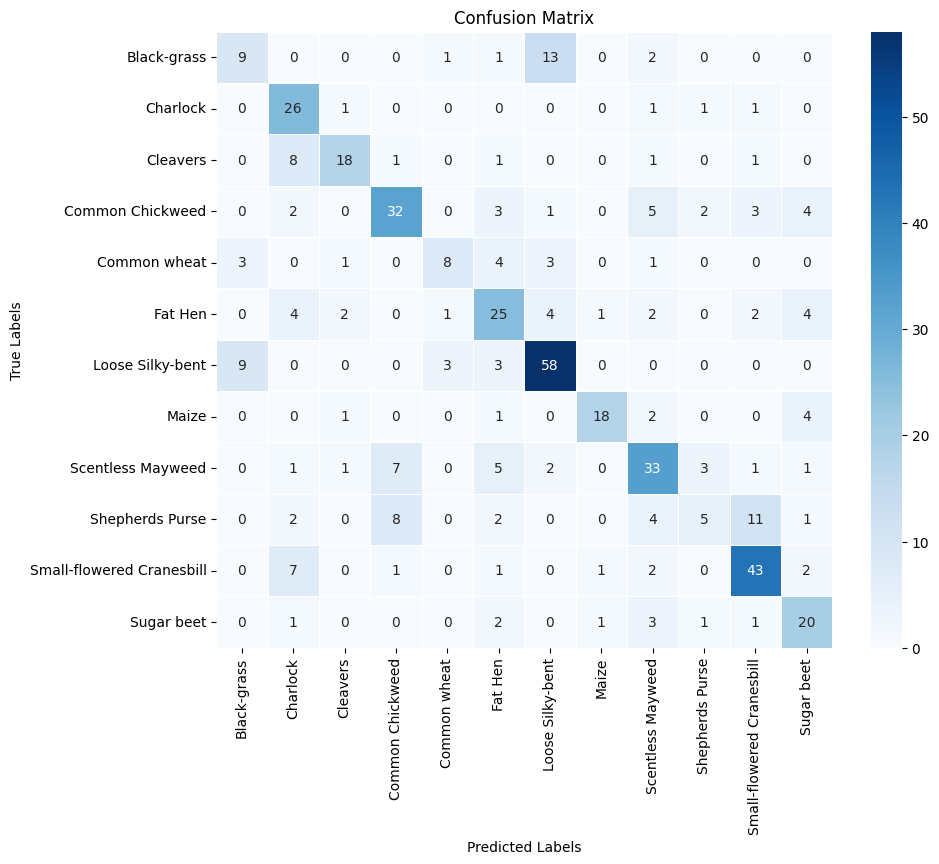

In [176]:
# Convert predictions to label indices
y_pred_arg_augmented_vgg16 = np.argmax(y_pred_test_augmented_vgg16, axis=1)
y_test_arg_augmented_vgg16 = y_test_encoded.astype(np.int32)

# Ensure y_pred_arg_initial is also int32 for compatibility
y_pred_arg_augmented_vgg16 = y_pred_arg_augmented_vgg16.astype(np.int32)

# Generate the confusion matrix using scikit-learn (recommended)
confusion_matrix_augmented_vgg16 = sk_confusion_matrix(y_test_arg_augmented_vgg16, y_pred_arg_augmented_vgg16)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_augmented_vgg16,
    annot=True,
    cmap="Blues",
    linewidths=.4,
    fmt="d",
    square=True,
    xticklabels=list(label_mapping.keys()),
    yticklabels=list(label_mapping.keys())
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_matrix_augmented_vgg16)

### Observations (`model_augmented_vgg16`)
The model's performance metrics indicate a **training accuracy of 77%**, suggesting a moderate level of learning from the training data. However, the **validation accuracy drops to 66%**, indicating potential overfitting, as the model may not generalize well to unseen data. The **test accuracy of 62%** further highlights challenges in the model’s ability to accurately classify instances across different classes, especially given the varying levels of confusion observed in the confusion matrix.

## Final Model

We have trained three models: the initial CNN model without data augmentation (`model_initial`), a CNN model with data augmentation (`model_augmented`), and a model using VGG16 transfer learning with data augmentation (`model_augmented_vgg16`).

We will now compare their performance to determine which model generalizes best and provides the most robust results.

In [177]:
# Evaluate Initial Model
_, train_performance_initial = model_initial.evaluate(X_train, y_train)
_, val_performance_initial = model_initial.evaluate(X_val, y_val)
_, test_performance_initial = model_initial.evaluate(X_test, y_test)

# Evaluate Augmented Model
_, train_performance_augmented = model_augmented.evaluate(X_train, y_train)
_, val_performance_augmented = model_augmented.evaluate(X_val, y_val)
_, test_performance_augmented = model_augmented.evaluate(X_test, y_test)

# Evaluate Augmented Model with VGG16
_, train_performance_vgg16 = model_augmented_vgg16.evaluate(X_train, y_train)
_, val_performance_vgg16 = model_augmented_vgg16.evaluate(X_val, y_val)
_, test_performance_vgg16 = model_augmented_vgg16.evaluate(X_test, y_test)

# Now create the comparison DataFrame with training, validation, and test performance
data = {
    'Model': ['Initial Model', 'Augmented Model', 'Augmented Model with VGG16'],
    'Train': [train_performance_initial, train_performance_augmented, train_performance_vgg16],
    'Validation': [val_performance_initial, val_performance_augmented, val_performance_vgg16],
    'Test': [test_performance_initial, test_performance_augmented, test_performance_vgg16]
}

# Creating a DataFrame
result_df = pd.DataFrame(data)

# Displaying the DataFrame
print("\nModel Performance Comparison")
print("-" * 30)
print(result_df)


119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9411 - loss: 0.1512
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9028 - loss: 0.3573
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8210 - loss: 0.6034
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9420 - loss: 0.1333
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9000 - loss: 0.2961
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8871 - loss: 0.4275
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 266ms/step - accuracy: 0.7763 - loss: 0.6732
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.6850 - loss: 0.8834
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.6079 - loss: 1.1641

Model Performance Comparison
------------------------------
                        Model     Train  Validation      Test
0               Initial Model  0.942632    0.905263  0.837895
1             Augmented Model  0.948158    0.894737  0.882105
2  Augmented Model with VGG16  0.773158    0.663158  0.621053


**Selected Model**: Augmented Model (*`model_augmented`*)  
The Augmented Model is chosen as the final model for the plant seedlings classification task due to its superior test performance. This model demonstrates effective capability in accurately classifying different plant species, outperforming the other models in the comparison.

### Visualizing the prediction

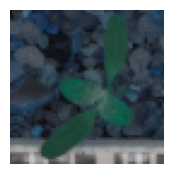

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Label: Fat Hen
True Label: Fat Hen


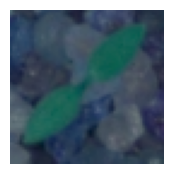

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label: Common Chickweed
True Label: Common Chickweed


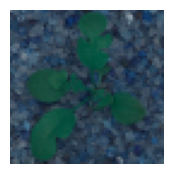

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Label: Shepherds Purse
True Label: Shepherds Purse


In [178]:
# Function to visualize predictions for a given index
def visualize_prediction(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[index])
    plt.axis('off')  # Hide axes
    plt.show()

    # Predict and get labels
    predicted_index = model_augmented.predict((X_test_normalized[index].reshape(1, 64, 64, 3))).argmax(axis=1)  # Get the predicted class index
    predicted_label = label_encoder.inverse_transform(predicted_index)  # Decode the predicted label
    true_label = label_encoder.inverse_transform(y_test_encoded)[index]  # Get the true label

    print('Predicted Label:', predicted_label[0])  # Access the first item in the array
    print('True Label:', true_label)

# Visualize predictions for specific indices
indices_to_visualize = [2, 33, 36]  # Example indices; you can choose different ones

for idx in indices_to_visualize:
    visualize_prediction(idx)


## Actionable Insights and Business Recommendations
### Actionable Insights
- **Model Performance**:
  - The augmented model achieves a test accuracy of 88%, indicating strong classification capabilities.
  - Initial models show signs of overfitting, particularly the VGG16 transfer learning approach.

- **Utilize High-Performing Model**: Deploy the augmented model for real-time classification of plant seedlings to maximize efficiency.

- **Target Class Confusion**: Address misclassification issues for species like Black-grass and Common Chickweed by gathering additional training data or refining the model.

- **Data Augmentation Strategies**: Explore and implement further data augmentation techniques to enhance model robustness and reduce overfitting risks.

- **Image Quality Check**: Verify all images are in RGB format to avoid compatibility issues during processing.

### Business Recommendations
- **Training & Support**: Offer training sessions for users to help them interpret model outputs and leverage results for better decision-making.

- **Continuous Monitoring**: Regularly assess model performance and retrain using updated datasets to adapt to evolving plant growth patterns.

- **User Feedback Integration**: Create a feedback loop with end-users to collect insights on model performance in real-world scenarios, guiding future enhancements.

- **Marketing of Solutions**: Promote the model's capabilities to agricultural practitioners, highlighting its accuracy and efficiency in identifying various plant species.

_____